In [1]:
import pandas as pd

# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append('../language_processing/')
from preprocess_transcription import Preprocessor
from ontological_processor import OntologicalProcessor
from callsign_matcher import CallsignMatcher

# Loading and Processing the Data

We'll begin by loading the track data

In [2]:
track_data_path = '../flight_data/01-08-2022_adsbx.csv'
command_data_path = '../sample_transcriptions/01-08-22.json'

track_df = pd.read_csv(track_data_path)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (37,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
def get_callsign_prefix(callsign):
    if type(callsign) == str:
        if callsign[0] == 'N':
            return 'N'
        return callsign[:3]
    return None

Next we'll load the command data via the preprocessor module, which currently takes in txt log files as an input

In [4]:
proc = Preprocessor(command_data_path, log=False)
command_df = proc.get_transcriptions(15)

In [5]:
command_df

,id,Time,Transcriptions,Length
0,16AFFDCD-0A26-4A57-8831-826A166C1AA6,1641619312,190 WELL GET YOU OUT OF THE SPEED WERE CLEARED...,74
1,C55B8A21-4C64-4AB5-8A12-5FD54E904FB8,1641619315,BIZEX 329 TURN LEFT HEADING 1,29
2,8ED06B7F-36B0-4CEF-80C8-D4F011052617,1641619319,CORRECTION 29 ROGER,19
3,57A187E9-299C-488A-A176-37A03094E54E,1641619332,US AIR 268 YOUR OVER LONER CLEARED ILS DME APP...,199
4,AF14D11F-592F-4974-B38C-BD9FC5B7EC03,1641619343,CESSNA 01C VFR DESCENT MAINTAIN 1C BIZEX 329 ...,62
...,...,...,...,...
591,5A805D4B-F3E2-45D6-ACF8-C6CF4CC1D4C9,1641626587,CLIPPER 6540 TURN LEFT HEADING 300 INTERCEPT T...,58
592,FB6CCC1F-9297-4100-AC76-BE63188E081A,1641626603,HEADING 300 INTERCEPT THE LOCALIZER 6540 BIZEX...,167
594,2CA026BE-F554-4DD0-87B2-5B1C16B9F8DB,1641626617,CLIPPER 6547 MILES FROM RIPIT HEADING 300 MAIN...,155
595,5AAAD68E-F803-470E-B901-CCF45DFEB334,1641626623,6540 AH 190 OR GREATER TO AH RIPIT,34


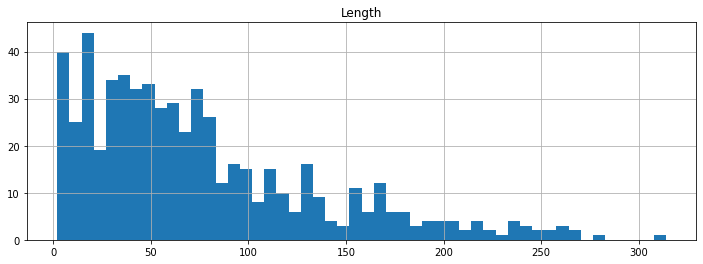

In [6]:
proc.plot_length_distribution()

NOTE: this graph above shows that many commands are only a few words or less, suggesting the transcription quality to be sub-par. These are likely fragments.

Now we'll apply the OntologicalProcessor class to parse through the transcriptions and perform rule-based command recognition

In [7]:
op = OntologicalProcessor()
command_df['altitude'] = command_df['Transcriptions'].apply(op.find_alt)
command_df['heading'] = command_df['Transcriptions'].apply(op.find_turn)
command_df['speed'] = command_df['Transcriptions'].apply(op.find_speed)
command_df['contact'] = command_df['Transcriptions'].apply(op.find_contact)
command_df['clearance'] = command_df['Transcriptions'].apply(op.find_clearance)
command_df['callsign'] = command_df['Transcriptions'].apply(op.find_callsign)

/var/folders/3y/z31hkzws5bzg8r8k97mj_3xh0000gp/T/ipykernel_80377/161174007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  command_df['altitude'] = command_df['Transcriptions'].apply(op.find_alt)
/var/folders/3y/z31hkzws5bzg8r8k97mj_3xh0000gp/T/ipykernel_80377/161174007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  command_df['heading'] = command_df['Transcriptions'].apply(op.find_turn)
/var/folders/3y/z31hkzws5bzg8r8k97mj_3xh0000gp/T/ipykernel_80377/161174007.py:4: SettingWithCopyWarning: 
A valu

In [8]:
command_df

,id,Time,Transcriptions,Length,altitude,heading,speed,contact,clearance,callsign
0,16AFFDCD-0A26-4A57-8831-826A166C1AA6,1641619312,190 WELL GET YOU OUT OF THE SPEED WERE CLEARED...,74,NA,NA,Missing ST,False,True,37
1,C55B8A21-4C64-4AB5-8A12-5FD54E904FB8,1641619315,BIZEX 329 TURN LEFT HEADING 1,29,NA,Missing ST,NA,False,False,329
2,8ED06B7F-36B0-4CEF-80C8-D4F011052617,1641619319,CORRECTION 29 ROGER,19,NA,NA,NA,False,False,NA
3,57A187E9-299C-488A-A176-37A03094E54E,1641619332,US AIR 268 YOUR OVER LONER CLEARED ILS DME APP...,199,NA,Missing ST,NA,True,True,Nus
4,AF14D11F-592F-4974-B38C-BD9FC5B7EC03,1641619343,CESSNA 01C VFR DESCENT MAINTAIN 1C BIZEX 329 ...,62,Missing ST,NA,NA,False,False,329
...,...,...,...,...,...,...,...,...,...,...
591,5A805D4B-F3E2-45D6-ACF8-C6CF4CC1D4C9,1641626587,CLIPPER 6540 TURN LEFT HEADING 300 INTERCEPT T...,58,NA,300,NA,False,False,6540
592,FB6CCC1F-9297-4100-AC76-BE63188E081A,1641626603,HEADING 300 INTERCEPT THE LOCALIZER 6540 BIZEX...,167,Possibly Missing KW,300,NA,False,True,465
594,2CA026BE-F554-4DD0-87B2-5B1C16B9F8DB,1641626617,CLIPPER 6547 MILES FROM RIPIT HEADING 300 MAIN...,155,Possibly Missing KW,300,190,False,True,6547
595,5AAAD68E-F803-470E-B901-CCF45DFEB334,1641626623,6540 AH 190 OR GREATER TO AH RIPIT,34,NA,NA,NA,False,False,NA


In [9]:
cm = CallsignMatcher(track_data_path)

/var/folders/3y/z31hkzws5bzg8r8k97mj_3xh0000gp/T/ipykernel_80377/1480911936.py:1: DtypeWarning: Columns (37,57) have mixed types.Specify dtype option on import or set low_memory=False.
  cm = CallsignMatcher(track_data_path)


# Processing Data

In [76]:
# Create function which processes altitude
# Input: track data frame for callsign, time
# Output: time it takes to reach altitude w/ tolearnce (NA if never reached)
# leaving out the *3.28084


def change_altitude_time(df_track, input_row, tolerance=500):
    filtered_track = df_track[df_track['time']>input_row['Time']]

    for index, row in filtered_track.iterrows():
        print(row['alt_baro'])
        print(row)
        if (int(row['alt_baro']) > int(input_row['altitude']) - tolerance) and (int(row['alt_baro']) < int(input_row['altitude']) + tolerance):
            print('hi')
            return row['time']-input_row['Time']
    return 'Not Reached'

In [ ]:
change_altitude_time()

In [11]:
# Create function which processes heading
# Input: track data frame for callsign, time
# Output: time it takes to reach heading (NA if never reached)

# NOTE: this only accounts for change heading commands and doesn't account for anything 

def change_heading_time(df_track, input_row, tolerance=5):
    filtered_track = df_track[df_track['time']>input_row['Time']]

    for index, row in filtered_track.iterrows():
        if (int(row['track']) > int(input_row['heading']) - tolerance) and (int(row['track']) < input_row['heading'] + tolerance):
            return row['time']-input_row['Time']
    return 'Not Reached'

In [12]:
# Create function which processes speed
# Input: track data frame for callsign, time
# Output: time it takes to reach speed w/ tolerance (NA if never reached)

def change_speed_time(df_track, input_row, tolerance=50):
    filtered_track = df_track[df_track['time']>input_row['Time']]

    for index, row in filtered_track.iterrows():
        if (int(row['gs']) > int(input_row['speed']) - tolerance) and (int(row['gs']) < input_row['speed'] + tolerance):
            return row['time']-input_row['Time']
    return 'Not Reached'

In [68]:
# Create a function which takes in callsign and creates a DF of commands.
# Maybe filter for those w/ more than one command???
# Create a new dataframe of track data for that callsign 
# Loop through command DF starting from the top
# If find any alt, heading, or speed command, call respective function

def data_extractor(callsign):
    # Create a new data frame of commands for a callsign
    df_commands = command_df[command_df['callsign'] == callsign]
    # Create a new dataframe of track data for that callsign 
    df_track = track_df[track_df['flight'].str.contains(callsign, na=False)]

    altitude_times = []
    heading_times = []
    speed_times = []

    # Loop through command DF starting from the top
    for index, row in df_commands.iterrows():
        # If find any alt, heading, or speed command, call respective function
        try:
            int(row['altitude'])
            altitude_times.append(change_altitude_time(df_track, row))
        except:
            altitude_times.append('No Command')
        try:
            int(row['heading'])
            heading_times.append(change_heading_time(df_track, row))
        except:
            heading_times.append('No Command')
        try:
            int(row['speed'])
            speed_times.append(change_speed_time(df_track, row))
        except:
            speed_times.append('No Command')

    df_commands['altitude_time'] = altitude_times
    df_commands['heading_time'] = heading_times
    df_commands['speed_time'] = speed_times

    return df_commands
        

# Processing Response Times

In [53]:
#command_df['Time'] = command_df['Time'].apply(lambda x: x -10800)

/var/folders/3y/z31hkzws5bzg8r8k97mj_3xh0000gp/T/ipykernel_80377/3631770484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  command_df['Time'] = command_df['Time'].apply(lambda x: x -10800)


In [55]:
command_df['matched_callsigns'].unique()

array(['X       ', 'NA', '1573    ', 'N3ET    ', 'AAL2736 ', 'AAL380  ',
       'NSH7    ', 'DAL910  ', 'N462P   ', 'N19806  ', 'FDY426  ',
       'N50EL   ', '0013    ', 'N96AE   ', 'DAL383  ', 'N8377S  ',
       'AAL446  ', 'AAL1234 ', 'UAL366  '], dtype=object)

In [20]:
command_df['callsign'].unique()

array(['37', '329', 'NA', 'Nus', '3788', '3725', '1178', '536', 'Nair',
       'DAL258', 'DAL58', '458', 'DAL210', '418', '472', '4', '504500',
       '500', 'AAL736', '1072', '3727', 'CACTUS826', '380', 'DAL1776',
       'UAL174', 'DAL110', 'UAL92', '422', '182', 'N422', 'AAL94',
       'AAL74', '538', '620', '1876', '623', '358', '426', '350', '796',
       'AAL166', '463', '3768', 'DAL59', 'DAL589', 'DAL590', '3776',
       'DAL445000', 'DAL440', '1234', 'DAL445', 'DAL352', 'UAL352', '46',
       '330', 'SKW1910', '830', 'DAL17', '465', '6540', '605', '6547'],
      dtype=object)

In [54]:
command_df['matched_callsigns'] = command_df.apply(lambda x: cm.find_match(callsign=str(x['callsign']), threshold=None, t=x['Time'], c=200), axis=1)

(array([104]),)
(array([ 26, 104, 110]),)
(array([103, 109]),)
(array([ 26, 102, 108]),)
(array([ 26, 101, 110]),)
(array([ 25, 101, 109]),)
(array([ 24, 100, 109]),)
(array([  0,   4,  76,  88,  98,  99, 108, 117, 118]),)
(array([ 22,  98, 108]),)
(array([  8, 100, 112, 124]),)
(array([  0,   2,   7,  79,  90,  95, 111]),)
(array([ 27,  96, 112]),)
(array([ 98, 115]),)
(array([ 98, 115]),)
(array([  8,  16,  28,  53,  64,  93,  99, 106, 116, 146]),)
(array([  9,  92, 100, 118, 147]),)
(array([ 99, 117]),)
(array([ 10,  18,  29,  54,  66,  95, 100, 108, 118, 145]),)
(array([  9,  90,  97, 116, 144]),)
(array([  9,  92,  97, 119, 144]),)
(array([ 93, 119]),)
(array([ 82, 119]),)
(array([ 81, 119]),)
(array([ 81, 119]),)
(array([ 78, 118]),)
(array([ 76, 118]),)
(array([ 75, 118]),)
(array([ 46, 122]),)
(array([151]),)
(array([147]),)
(array([ 36, 124, 157]),)
(array([ 31, 125, 143]),)
(array([ 31, 127, 153]),)
(array([ 31, 128, 152]),)
(array([ 28, 127, 149]),)
(array([128]),)
(array([ 

/var/folders/3y/z31hkzws5bzg8r8k97mj_3xh0000gp/T/ipykernel_80377/972981083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  command_df['matched_callsigns'] = command_df.apply(lambda x: cm.find_match(callsign=str(x['callsign']), threshold=None, t=x['Time'], c=200), axis=1)


In [62]:
# Create a new data frame of commands for a callsign
df_commands = command_df[command_df['matched_callsigns'] == 'AAL2736 ']
# Create a new dataframe of track data for that callsign 
df_track = track_df[track_df['flight'].str.contains('AAL2736', na=False)]

change_altitude_time(df_track, df_commands.iloc[0])

7800


ValueError: could not convert string to float: 'Missing ST'

In [63]:
df_commands

,id,Time,Transcriptions,Length,altitude,heading,speed,contact,clearance,callsign,matched_callsigns
146,AEA3197D-EF0E-4CD4-9115-BE4C2B9516E0,1641610091,BOSTON APPROACH AMERICAN 736 WITH YOU DESCENDI...,74,Missing ST,Missing ST,NA,False,False,AAL736,AAL2736
147,86023D2D-970A-4796-BB82-3087A2D6A31E,1641610098,AMERICAN 736 BOSTON APPROACH ROGER FLY HEADING...,124,Missing ST,360,NA,False,False,AAL736,AAL2736
150,C9716F38-9CB7-43EF-A650-07DDC7981E24,1641610165,AMERICAN 736 TURN LEFT HEADING AMERICAN 736,51,NA,Missing ST,NA,False,False,AAL736,AAL2736
154,D42685EE-F7FF-45C4-95C3-5C85B516F486,1641610224,AMERICAN 736 DESCEND AND MAINTAIN 2000 DOWN TO...,61,Missing ST,NA,NA,False,False,AAL736,AAL2736
157,856EBA2B-72DC-4370-B2C4-142F9B9B3E44,1641610247,AMERICAN 736 AH MAINTAIN 190 KNOTS OR GREATER ...,71,NA,NA,190,False,False,AAL736,AAL2736
168,7A5E50DF-C0C0-469A-93C8-15DF70058341,1641610341,AMERICAN 736 TRAFFIC LANDING 22 LEFT WILL HOLD...,114,NA,Missing ST,NA,True,False,AAL736,AAL2736


In [64]:
df_track

,hex,type,flight,r,t,alt_baro,alt_geom,gs,track,baro_rate,...,oat,tat,track_rate,roll,mag_heading,rr_lat,rr_lon,gpsOkBefore,time,acas_ra
336981,ad6c3b,adsb_icao,AAL2736,N964NN,B738,36000,36975.0,456.4,285.89,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641609e+09,NaN
337116,ad6c3b,adsb_icao,AAL2736,N964NN,B738,36000,36975.0,456.4,285.89,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641609e+09,NaN
337251,ad6c3b,adsb_icao,AAL2736,N964NN,B738,36000,36975.0,456.4,285.89,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641609e+09,NaN
337385,ad6c3b,adsb_icao,AAL2736,N964NN,B738,36000,36975.0,455.5,285.93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641609e+09,NaN
337518,ad6c3b,adsb_icao,AAL2736,N964NN,B738,36000,36975.0,455.5,285.93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641609e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909969,ac6445,adsb_icao,AAL2736,N898NN,B738,35325,36350.0,462.0,108.16,896.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641678e+09,NaN
1910170,ac6445,adsb_icao,AAL2736,N898NN,B738,35400,36425.0,461.7,108.04,896.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641678e+09,NaN
1910371,ac6445,adsb_icao,AAL2736,N898NN,B738,35475,36500.0,462.0,108.16,704.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641678e+09,NaN
1910573,ac6445,adsb_icao,AAL2736,N898NN,B738,35525,36575.0,463.3,108.24,576.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.641678e+09,NaN


In [50]:
df_commands

,id,Time,Transcriptions,Length,altitude,heading,speed,contact,clearance,callsign,matched_callsigns
81,3D819FDD-DDD1-4955-A1E8-62FF9131FBFD,1641620015,GOOD AFTERNOON APPROACH DELTA 258 HERE VACATIN...,79,NA,NA,NA,False,False,DAL258,DAL558
90,C4D40603-076E-418E-BFC4-EF9EA22D21DC,1641620129,DELTA 258 DESCEND AND MAINTAIN 3000,35,3000,NA,NA,False,False,DAL258,DAL558
91,57582A40-F6C4-4F12-B3B2-A023F44F9AB3,1641620132,CONTINUE TO 3004 DELTA 58,25,NA,NA,NA,False,False,DAL58,DAL558
92,B0FA207F-BF48-4D0A-BFB5-3B8C84179075,1641620178,DELTA 258 TURN LEFT HEADING 330,31,NA,330,NA,False,False,DAL258,DAL558
99,AB81614F-627C-458F-8EAF-41A84DFF8570,1641620233,DELTA 258 TURN LEFT HEADING 300 YOUR 7 MILES F...,110,Possibly Missing KW,300,NA,False,True,DAL258,DAL558
108,A26C2632-4A65-402E-8C52-02579DD9B36D,1641620384,DELTA 258 REDUCE AND MAINTAIN SPEED 170 TILL R...,246,Possibly Missing KW,Missing ST,170,False,False,DAL258,DAL558


In [77]:
times_df = pd.DataFrame()

for callsign in matched_callsigns:
    times_df = times_df.append(data_extractor(callsign))

In [74]:
times_df.head(50)

,id,Time,Transcriptions,Length,altitude,heading,speed,contact,clearance,callsign,matched_callsigns,altitude_time,heading_time,speed_time
2,8ED06B7F-36B0-4CEF-80C8-D4F011052617,1641608519,CORRECTION 29 ROGER,19,NA,NA,NA,False,False,NA,NA,No Command,No Command,No Command
5,F6ED444E-7596-46C7-B458-DCBAB1ADD4ED,1641608547,1235 MILES LEAVING 3500 IS AH MERLIN,36,Possibly Missing KW,NA,NA,False,False,NA,NA,No Command,No Command,No Command
6,A28AF129-C644-428A-B139-58D7ADC35B68,1641608550,AND WERE LOOKING FOR THAT TRAFFIC 320,37,NA,NA,NA,False,False,NA,NA,No Command,No Command,No Command
10,5A3599E3-F9F9-40AF-8BD4-1E7223F5551A,1641608603,AH ROGER THAT SIR AH,20,NA,NA,NA,False,False,NA,NA,No Command,No Command,No Command
13,3E1C8BFB-674D-4D3C-A387-C4A535C42753,1641608629,WINCHESTER 01C TURN RIGHT HEADING,41,NA,Missing ST,NA,False,False,NA,NA,No Command,No Command,No Command
14,A988CFA8-BAA3-44FB-B225-59FBA3FA2CAB,1641608651,BOSTON APPROACH GULFSTREAM 221CM LEAVING 8400 ...,65,Possibly Missing KW,Missing ST,NA,False,False,NA,NA,No Command,No Command,No Command
16,DFFEA3DB-C12C-411D-A145-03EF5BB62368,1641608658,GULFSTREAM 221CM BOSTON APPROACH CONTROL ROGER...,72,4000,NA,NA,False,False,NA,NA,Not Reached,No Command,No Command
17,761C5C95-33AE-4503-9A4D-9B77B7EDBCEA,1641608661,OUT OF 8 FOR 4CM,16,NA,NA,NA,False,False,NA,NA,No Command,No Command,No Command
18,7BEE5E32-3AE9-453C-A69C-6BC29380FE15,1641608673,N2201C TRAFFIC 122 OCLOCK 4 MILES A 340 YOU TO...,71,NA,NA,NA,False,False,NA,NA,No Command,No Command,No Command
19,F563F56B-BBA8-40C1-A134-5FDD2C7A8EF7,1641608678,CESSNA 01C ADVISE TRAFFIC IN SIGHT LAST TRANSM...,63,NA,NA,NA,False,False,NA,NA,No Command,No Command,No Command
